In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

from lib.pca import PCAFeatures
import lib.utils as utils

In [2]:
train_imgs, train_labels = utils.load_train_images()
print(len(train_imgs))

3500


In [3]:
train_resized_imgs = utils.resize_imgs(train_imgs)
print(train_resized_imgs.shape)

(3500, 50, 50, 3)


(50, 50, 3)


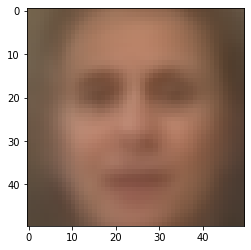

In [4]:
mean_img = utils.get_mean_img(train_resized_imgs)
print(mean_img.shape)
plt.imshow(mean_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
(3500, 50, 50, 3)


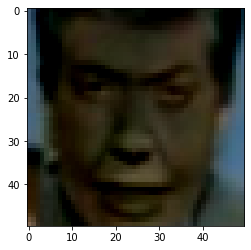

In [7]:
train_norm_imgs = utils.basic_imgs_normalization(train_resized_imgs)
print(train_norm_imgs.shape)
plt.imshow(train_norm_imgs[5])

In [8]:
train_features = utils.image_liniarization(train_norm_imgs)
print(train_features.shape)

(3500, 7500)


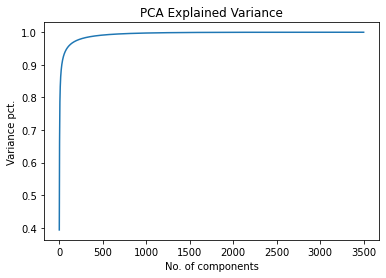

In [10]:
pca = PCA()
pca.fit(train_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No. of components")
plt.ylabel("Variance pct.")
plt.title("PCA Explained Variance")
plt.show()

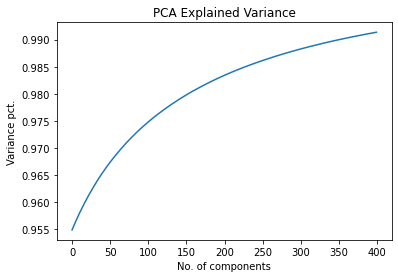

In [31]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)[100:500])
plt.xlabel("No. of components")
plt.ylabel("Variance pct.")
plt.title("PCA Explained Variance")
plt.show()

(3500, 2)


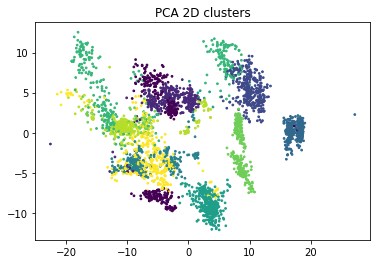

In [37]:
pca_2 = PCAFeatures(dim=2)
pca_2.fit(train_features)
train_features_reduced_2 = pca_2.transform(train_features)
print(train_features_reduced_2.shape)

plt.scatter(train_features_reduced_2[:, 0], train_features_reduced_2[:, 1], s=3, c=train_labels, cmap="viridis")
plt.title("PCA 2D clusters")
plt.show()

(3500, 3)


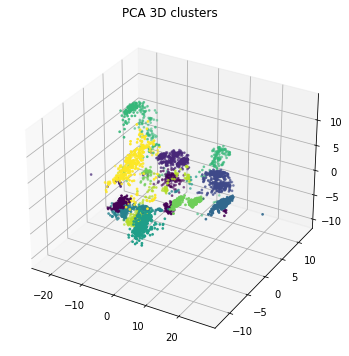

In [47]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

pca_3 = PCAFeatures(dim=3)
pca_3.fit(train_features)
train_features_reduced_3 = pca_3.transform(train_features)
print(train_features_reduced_3.shape)

ax.scatter(train_features_reduced_3[:, 0], train_features_reduced_3[:, 1], train_features_reduced_3[:, 2], s=3, c=train_labels, cmap="viridis")
plt.title("PCA 3D clusters")
plt.show()

In [48]:
pca_300 = PCAFeatures(dim=300)
pca_300.fit(train_features)
train_features_reduced_300 = pca_300.transform(train_features)
print(train_features_reduced_300.shape)

(3500, 300)
